# House Rocket Project

## 1- Import Libraries

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

## 2- Dados

### 2.1- Importação dos dados

In [3]:
data = pd.read_csv( 'kc_house_data.csv' )

### 2.2- Tamanho do dataset e tipo das variáveis 

In [4]:
print( f' Number of rows: {data.shape[0]}' )
print( f' Number of columns: {data.shape[1]}' )

data.dtypes

 Number of rows: 21613
 Number of columns: 21


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### 2.3- Transformação dos dados 

In [5]:
# date em formato de data
data['date'] = pd.to_datetime( data['date'])
# bathrooms & floors em inteiro
data['bathrooms'] = data['bathrooms'].astype( int )
data['floors'] = data['floors'].astype( int )

### 2.4- Limpeza de dados

In [6]:
# 'ID's unicos
print( f'Number of ID unique: {len( data["id"].unique() )}')

data.sort_values( 'id' ).head(10)

Number of ID unique: 21436


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,2015-04-22,300000.00,6,3,2400,9373,2,0,0,...,7,2400.00,0,1991,0,98002,47.33,-122.21,2060,7316
2496,1000102,2014-09-16,280000.00,6,3,2400,9373,2,0,0,...,7,2400.00,0,1991,0,98002,47.33,-122.21,2060,7316
6735,1200019,2014-05-08,647500.00,4,1,2060,26036,1,0,0,...,8,1160.00,900,1947,0,98166,47.44,-122.35,2590,21891
8411,1200021,2014-08-11,400000.00,3,1,1460,43000,1,0,0,...,7,1460.00,0,1952,0,98166,47.44,-122.35,2250,20023
8809,2800031,2015-04-01,235000.00,3,1,1430,7599,1,0,0,...,6,1010.00,420,1930,0,98168,47.48,-122.27,1290,10320
3557,3600057,2015-03-19,402500.00,4,2,1650,3504,1,0,0,...,7,760.00,890,1951,2013,98144,47.58,-122.29,1480,3504
18521,3600072,2015-03-30,680000.00,4,2,2220,5310,1,0,0,...,7,1170.00,1050,1951,0,98144,47.58,-122.29,1540,4200
3200,3800008,2015-02-24,178000.00,5,1,1990,18200,1,0,0,...,7,1990.00,0,1960,0,98178,47.49,-122.26,1860,8658
21063,5200087,2014-07-09,487000.00,4,2,2540,5001,2,0,0,...,9,2540.00,0,2005,0,98108,47.54,-122.30,2360,6834
4333,6200017,2014-11-12,281000.00,3,1,1340,21336,1,0,0,...,5,1340.00,0,1945,0,98032,47.40,-122.27,1340,37703


In [7]:
# Delete 'ID's duplicados
data = data.drop_duplicates( subset=['id'], keep='last')

data.sort_values( 'id' ).head( 5 )

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,2015-04-22,300000.00,6,3,2400,9373,2,0,0,...,7,2400.00,0,1991,0,98002,47.33,-122.21,2060,7316
6735,1200019,2014-05-08,647500.00,4,1,2060,26036,1,0,0,...,8,1160.00,900,1947,0,98166,47.44,-122.35,2590,21891
8411,1200021,2014-08-11,400000.00,3,1,1460,43000,1,0,0,...,7,1460.00,0,1952,0,98166,47.44,-122.35,2250,20023
8809,2800031,2015-04-01,235000.00,3,1,1430,7599,1,0,0,...,6,1010.00,420,1930,0,98168,47.48,-122.27,1290,10320
3557,3600057,2015-03-19,402500.00,4,2,1650,3504,1,0,0,...,7,760.00,890,1951,2013,98144,47.58,-122.29,1480,3504


In [8]:
# check "Na"
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# Removendo "Na"
data = data.dropna( subset=['sqft_above'], axis=0 )

In [10]:
# Verificação de Outliers 
unique = data[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']]

for i in unique:
    print( f'Atributo: {i} = {data[i].unique().tolist()}' )

Atributo: bedrooms = [3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]
Atributo: bathrooms = [1, 2, 3, 4, 0, 5, 6, 8, 7]
Atributo: floors = [1, 2, 3]
Atributo: waterfront = [0, 1]
Atributo: view = [0, 3, 4, 2, 1]
Atributo: condition = [3, 5, 4, 1, 2]
Atributo: grade = [7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13, 1]


In [11]:
# Delete imóvel com 'bedrooms' == 33
data.drop( data.loc[ data['bedrooms'] == 33 ].index, inplace=True )
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10])

## 3- Exploração dos dados

### 3.1- Statistic Descriptive

In [12]:
num_attributes = data.select_dtypes( include=['int64', 'float64'] )
num_attributes = num_attributes.iloc[:, 1: ]# removendo colunas "ID" e "DATE"
num_attributes = num_attributes.drop(columns=['waterfront','zipcode', 'lat','long'])# removendo colunas "ZIPCODE", "LAT" e "LONG"

media = pd.DataFrame( num_attributes.apply( np.mean ))
mediana = pd.DataFrame( num_attributes.apply( np.median ))
std = pd.DataFrame( num_attributes.apply( np.std ))

max_ = pd.DataFrame( num_attributes.apply( np.max ))
min_ = pd.DataFrame( num_attributes.apply( np.min ))

# concatenar
df1 = pd.concat([max_, min_, media, mediana, std], axis=1).reset_index()
df1.columns = ['attributes', 'max', 'min', 'mean', 'median', 'std']
df1

,attributes,max,min,mean,median,std
0,price,7700000.00,75000.00,541642.38,450000.00,367330.32
1,bedrooms,11.00,0.00,3.37,3.00,0.91
2,bathrooms,8.00,0.00,1.75,2.00,0.73
3,sqft_living,13540.00,290.00,2082.68,1920.00,919.12
4,sqft_lot,1651359.00,520.00,15136.82,7614.00,41540.43
5,floors,3.00,1.00,1.45,1.00,0.55
6,view,4.00,0.00,0.24,0.00,0.77
7,condition,5.00,1.00,3.41,3.00,0.65
8,grade,13.00,1.00,7.66,7.00,1.17
9,sqft_above,9410.00,290.00,1791.00,1560.00,829.05


### 3.2- Feature Creation

In [13]:
df = data.copy()

# Ano de construção:  > & < 1955
df['constrution'] = df['yr_built'].apply( lambda x: '> 1955' if x > 1955
                                                             else '< 1955')

# Imóveis COM ou SEM porão
df['basement'] = df['sqft_basement'].apply( lambda x: 'no' if x == 0
                                                           else 'yes')

# Year
df['year'] = pd.to_datetime( df['date'] ).dt.year

# Month
df['month'] = pd.to_datetime( df['date'] ).dt.month
df['season'] = df['month'].apply(lambda x: 'summer' if (x > 5) & (x < 8) else
                                           'spring' if (x > 2) & (x < 5) else
                                           'fall' if (x > 8) & (x < 12) else
                                           'winter')


# criar um 'describe' para condição, para acrescentar no relatório

df['describe_condition'] = df['condition'].apply(lambda x: 'too bad' if x == 1 else
                                                           'bad' if x == 2 else
                                                           'median'if x == 3 else
                                                           'good' if x == 4 else
                                                           'excellent')


In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,constrution,basement,year,month,season,describe_condition
0,7129300520,2014-10-13,221900.00,3,1,1180,5650,1,0,0,...,47.51,-122.26,1340,5650,< 1955,no,2014,10,fall,median
1,6414100192,2014-12-09,538000.00,3,2,2570,7242,2,0,0,...,47.72,-122.32,1690,7639,< 1955,yes,2014,12,winter,median
2,5631500400,2015-02-25,180000.00,2,1,770,10000,1,0,0,...,47.74,-122.23,2720,8062,< 1955,no,2015,2,winter,median
3,2487200875,2014-12-09,604000.00,4,3,1960,5000,1,0,0,...,47.52,-122.39,1360,5000,> 1955,yes,2014,12,winter,excellent
4,1954400510,2015-02-18,510000.00,3,2,1680,8080,1,0,0,...,47.62,-122.05,1800,7503,> 1955,no,2015,2,winter,median


### 3.3- Insights

H1: Imóveis que possuem vista para água, são 30% mais caros, na média.

H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

H3: Imóveis sem porão possuem sqrt_lot, são 50% maiores do que com porão.

H4: O crescimento do preço dos imóveis YoY ( Year over Year ) é de 10%

H5: Imóveis com 3 banheiros tem um crescimento MoM ( Month over Month ) de 15%

### H1: Imóveis que possuem vista para água, são 30% mais caros, na média.

H1 é verdadeiro, pois imóveis com vista para água são em média 212% mais caro


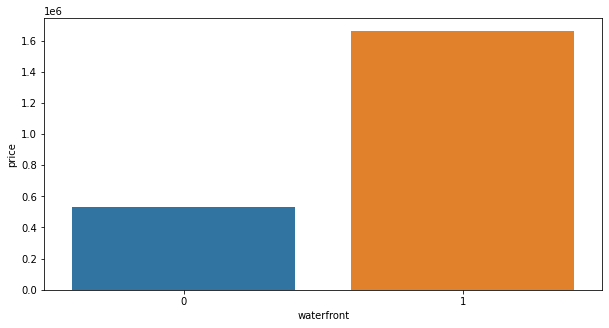

In [15]:
h1 = df[['price', 'waterfront']].groupby( 'waterfront' ).mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot( x='waterfront', y='price', data=h1);

h1_percent = ( h1.loc[1, 'price'] - h1.loc[0, 'price'] ) / h1.loc[0, 'price']
print( f'H1 é verdadeiro, pois imóveis com vista para água são em média {h1_percent:.0%} mais caro')

### H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

H2 é falsa, imóveis construídos antes 1955 são em média 1% mais barato


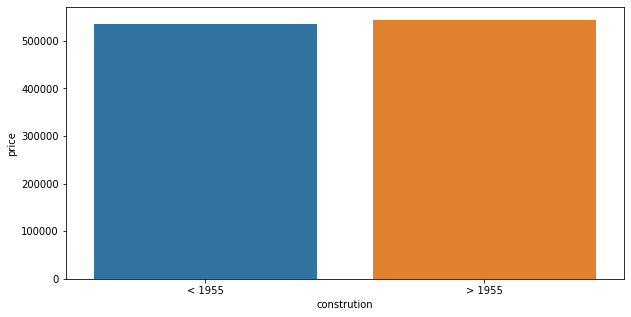

In [16]:
h2 = df[['constrution', 'price']].groupby( 'constrution' ).mean().reset_index()
plt.figure( figsize=(10,5))
sns.barplot( x='constrution', y='price', data=h2 );

h2_percent = ( h2.loc[1, 'price'] - h2.loc[0, 'price'] ) / h2.loc[0, 'price']
print( f'H2 é falsa, imóveis construídos antes 1955 são em média {h2_percent:.0%} mais barato')


### H3: Imóveis sem porão possuem sqrt_lot, são 50% maiores do que com porão.

H3 é Falso, pois os imóveis sem porão possuem sqrt_lot 19% maior do que imóveis com porão


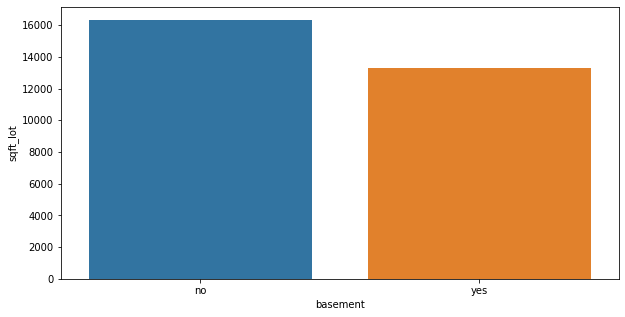

In [17]:
h3 = df[['sqft_lot','basement']].groupby( 'basement' ).mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot( x='basement', y='sqft_lot', data=h3 );

h3_percent = ( h3.loc[0, 'sqft_lot'] - h3.loc[1, 'sqft_lot'] ) / h3.loc[0, 'sqft_lot']
print(f'H3 é Falso, pois os imóveis sem porão possuem sqrt_lot {h3_percent:.0%} maior do que imóveis com porão')

In [18]:
h3

,basement,sqft_lot
0,no,16326.85
1,yes,13297.28


### H4: O crescimento do preço dos imóveis YoY ( Year over Year ) é de 10%

H4 é falso, o crescimento do preço entre os anos foi de 0.18%


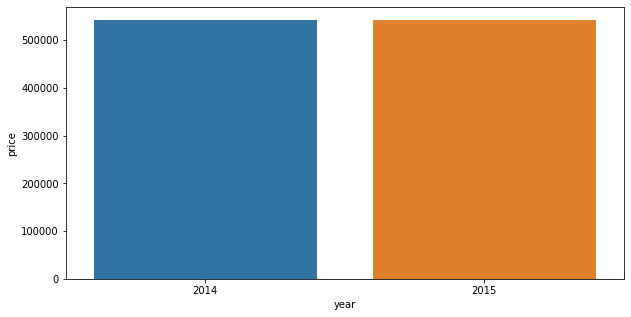

In [19]:
h4 = df[['price', 'year']].groupby( 'year' ).mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot( x='year', y='price', data=h4);

h4_percent = ( h4.loc[1, 'price'] - h4.loc[0, 'price'] ) / h4.loc[0, 'price']
print( f'H4 é falso, o crescimento do preço entre os anos foi de {h4_percent:.2%}' )

### H5: Imóveis com 3 banheiros tem um crescimento MoM ( Month over Month ) de 15%

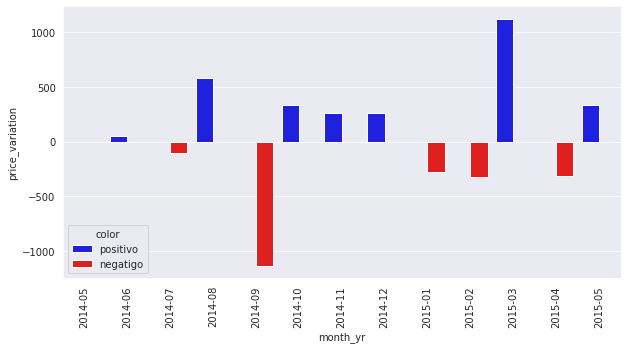

In [20]:
df5 = df[['price', 'bathrooms', 'date']].copy()
# montar um df apenas com imóveis com 03 banheiros
df5 = df5[df5['bathrooms'] == 3].reset_index( drop=True )
# cria coluna mês do ano: YYYY-mm
df5['month_yr'] = pd.to_datetime( df5['date'] ).dt.strftime( '%Y-%m')
# agrupar por data
h5 = df5[[ 'month_yr', 'price' ]].groupby( 'month_yr' ).mean().reset_index()

# diferença entre os preço MoM
h5['price_variation'] = h5['price'].diff() / 100
h5['color'] = h5['price_variation'].apply( lambda x: 'negatigo' if x < 0 else 'positivo')

# plot
sns.set_style('darkgrid')
color = ['blue', 'red']
plt.figure(figsize=(10,5))
sns.barplot( x='month_yr', y='price_variation', data=h5, hue='color', palette=color)
plt.xticks(rotation=90) # rotaciona a legenda do eixo X em 90 graus.
plt.show()

## 4- Questões do negócio

### 4.1- Quais são os imóveis que a House Rocket deveria comprar e por qual preço ?

In [21]:
# Agrupar os imóveis pelo (zipcode) e (mediana da região)
df1 = data[['zipcode','price']].groupby('zipcode').median().reset_index()
df1 = df1.rename(columns={'price': 'price_median'})

# unir df1 com dataset original, com mediano do zipcode
df = pd.merge(df1,df,on='zipcode',how='inner')      

In [22]:
# criar coluna "status" com a sugestão "buy" ou "no buy":
 # suferir a compra dos imóveis com preço a baixo da mediana da região e em boa condições.
for i in range( len(df) ):
    if ( df.loc[i, 'price'] < df.loc[i, 'price_median']) & (df.loc[i, 'condition'] >=3 ):
        df.loc[i, 'status'] = 'buy'
    else:
        df.loc[i, 'status'] = 'no buy'

In [23]:
buy_houses = df[df['status'] == 'buy'].sort_values(by=['describe_condition','price'])
df1 = buy_houses[['id','zipcode','price','price_median','condition']]

print( f'A diponível para compra {len(buy_houses)} imóveis nas comdições acima')
df1.head()

# Relátorio
df1.to_csv('/home/cassiano/repos/Projeto_Insight_House_Rocket/report_houses.csv')

A diponível para compra 10504 imóveis nas comdições acima


### 4.2- Uma vez a casa comprada, qual o melhor momento para vendê-las e por qual preço ?

In [24]:
# Agrupar os imóveis por região ( coluna zipcode ) e por sazonalidade (season)
# Dentro de cada região/season encontrar a mediana do preço do imóvel.
df2 = df[['zipcode', 'price', 'season']].groupby(['zipcode', 'season']).median().reset_index()
df2 = df2.rename(columns={'price': 'price_median_season'})

# unir df2 com dataset original, com mediano região/season
df3 = pd.merge(buy_houses,df2,how ='inner', on=['zipcode','season'])

In [25]:
# condições para venda do imóvel
# A) Se o imóvel foi comprado preço acima da mediana da região + sazonalidade.
# => O preço de venda deve ser igual ao preço da compra + acréscimo de 10%
# B) Se o imóvel foi comprado preço abaixo da mediana da região + sazonalidade.
# => O preço de venda deve ser igual ao preço da compra + acréscimo de 30%

for i in range( len( df3 )):
    if df3.loc[i, 'price'] <= df3.loc[i, 'price_median_season']:
        df3.loc[i, 'sale_price'] = df3.loc[i, 'price'] * 1.30
    elif df3.loc[i, 'price'] > df3.loc[i, 'price_median_season']:
        df3.loc[i, 'sale_price'] = df3.loc[i, 'price'] * 1.10
    else:
        pass
    
df3['gain'] = df3['sale_price'] - df3['price']

In [26]:
df3 = df3[['id', 'zipcode', 'price', 'price_median', 'price_median_season', 'describe_condition', 'status', 'sale_price', 'gain']]

# Relátorio
df3.to_csv('/home/cassiano/repos/Projeto_Insight_House_Rocket/buy_recommendation.csv')

df3.head()

,id,zipcode,price,price_median,price_median_season,describe_condition,status,sale_price,gain
0,5111400086,98038,110000.00,342500.00,342000.00,excellent,buy,143000.00,33000.00
1,1545801970,98038,250000.00,342500.00,342000.00,excellent,buy,325000.00,75000.00
2,1545806720,98038,254950.00,342500.00,342000.00,excellent,buy,331435.00,76485.00
3,1545803340,98038,269000.00,342500.00,342000.00,excellent,buy,349700.00,80700.00
4,1545807990,98038,315000.00,342500.00,342000.00,excellent,buy,409500.00,94500.00


In [27]:
df4 = df3[['price', 'status', 'sale_price', 'gain']].groupby( 'status' ).sum().reset_index()
df4 = df4.rename(columns={'price': 'custo_total', 'sale_price': 'total_receita ', 'gain': 'total_lucro'})
df4

,status,custo_total,total_receita,total_lucro
0,buy,4079101744.00,5265595032.20,1186493288.20
